<a href="https://colab.research.google.com/github/saw9090/-/blob/main/real_time_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from skfda.representation.basis import CustomBasis
from skfda import FDataGrid

In [6]:
import matplotlib.pyplot as plt

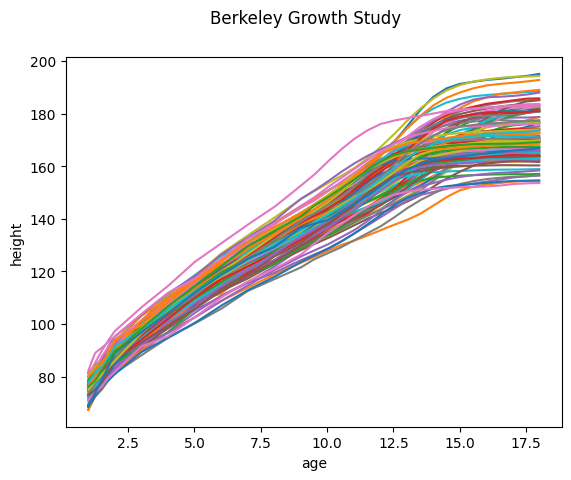

In [7]:
import skfda
import matplotlib.pyplot as plt

X, y = skfda.datasets.fetch_growth(return_X_y=True)

X.plot()
plt.show()

In [8]:
len(X.grid_points[0])

31

In [9]:
import numpy as np
def fun(x, t):
  return np.maximum(x - t, 0) ** 3
def poli(x,p) :
  return x**p

In [10]:
import numpy as np
import skfda
from skfda.representation.grid import FDataGrid

In [11]:
X.grid_points[0]

array([ 1.  ,  1.25,  1.5 ,  1.75,  2.  ,  3.  ,  4.  ,  5.  ,  6.  ,
        7.  ,  8.  ,  8.5 ,  9.  ,  9.5 , 10.  , 10.5 , 11.  , 11.5 ,
       12.  , 12.5 , 13.  , 13.5 , 14.  , 14.5 , 15.  , 15.5 , 16.  ,
       16.5 , 17.  , 17.5 , 18.  ])

In [12]:
X, y = skfda.datasets.fetch_growth(return_X_y=True)
grid = X.grid_points[0]
basis_matrix = np.zeros((4,len(X.grid_points[0])))
for i in range(4) :
  basis_matrix[i,:] = poli(x=grid, p=i)
for i in np.arange(6, 18) :
  basis_matrix = np.vstack((basis_matrix, fun(x=grid, t=i)))

In [13]:
basis_matrix.shape

(16, 31)

In [14]:
X, y = skfda.datasets.fetch_growth(return_X_y=True)
X_train = np.squeeze(X.data_matrix)[:-3,:]
y_train = X_train[:,-1]
X_test = np.squeeze(X.data_matrix)[-3:,:]
y_test = X_test[:,-1]

In [15]:
from skfda.misc import inner_product
N = X_train.shape[0]
K = basis_matrix.shape[0]
X_matrix = np.zeros((N,K))
for n in range(N):
  for k in range(K) :
    fd1 = skfda.FDataGrid(X_train[n,:],grid)
    fd2 = skfda.FDataGrid(basis_matrix[k,:],grid)
    X_matrix[n,k] = inner_product(fd1, fd2)
beta = np.linalg.pinv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_train

In [16]:
X_pred = np.zeros(K)
for k in range(K) :
    fd1 = skfda.FDataGrid(X_test[0,:],grid)
    fd2 = skfda.FDataGrid(basis_matrix[k,:],grid)
    X_pred[k] = inner_product(fd1, fd2)
print(beta @ X_pred)
print(y_test[0])

166.67026289307978
166.8


In [17]:
from skfda.misc import inner_product
N = X_train.shape[0]
T = 6
beta = np.zeros(K)
grid = X.grid_points[0][:11]
X_matrix = np.zeros((N,T))
for n in range(N):
  for t in range(T) :
    fd1 = skfda.FDataGrid(X_train[n,:11],grid)
    fd2 = skfda.FDataGrid(basis_matrix[t,:11],grid)
    X_matrix[n,t] = inner_product(fd1, fd2)
beta[:T] = np.linalg.pinv(X_matrix.T @ X_matrix) @ X_matrix.T @ y_train

In [18]:
beta[:T]

array([  5.5770102 ,  -6.96296914,   2.64646841,  -0.2945696 ,
        14.67398665, -78.36545054])

In [19]:
for j in range(3) :
  X_pred = np.zeros(T)
  for t in range(T) :
    fd1 = skfda.FDataGrid(X_test[j,:11],grid)
    fd2 = skfda.FDataGrid(basis_matrix[t,:11],grid)
    X_pred[t] = inner_product(fd1, fd2)
  print(beta[:T] @ X_pred)
  print(y_test[j])

167.4989920901794
166.8
179.1675990640224
168.6
178.11423338635905
169.2


In [20]:
X.grid_points[0][28]

17.0

In [21]:
X.grid_points[0][10:13]

array([8. , 8.5, 9. ])

In [37]:
X.grid_points[0][30]

18.0

In [23]:
grid = X.grid_points[0][:11]
for m in range(K-T) :
  X_tilde = np.zeros((N,m+T))
  grid_new = X.grid_points[0][2*m+T+4:2*m+T+7]
  print(grid_new)
  X_tilde_0 = np.zeros(N)
  for n in range(N):
    fd1 = skfda.FDataGrid(X_train[n,2*m+T+4:2*m+T+7],grid_new)
    fd2 = skfda.FDataGrid(basis_matrix[m+T,2*m+T+4:2*m+T+7],grid_new)
    X_tilde_0[n] = inner_product(fd1, fd2)
  beta_new = (y_train -X_matrix @ beta[:m+T]) @ X_tilde_0 /(X_tilde_0 @ X_tilde_0)
  X_matrix = np.hstack((X_matrix,X_tilde_0.reshape(-1,1)))
  beta[m+T] = beta_new

[8.  8.5 9. ]
[ 9.   9.5 10. ]
[10.  10.5 11. ]
[11.  11.5 12. ]
[12.  12.5 13. ]
[13.  13.5 14. ]
[14.  14.5 15. ]
[15.  15.5 16. ]
[16.  16.5 17. ]
[17.  17.5 18. ]


In [24]:
beta

array([ 5.57701020e+00, -6.96296914e+00,  2.64646841e+00, -2.94569605e-01,
        1.46739867e+01, -7.83654505e+01,  1.07672097e-04, -2.38319019e-04,
       -6.72249911e-04, -4.67920749e-04,  6.48257619e-04,  1.63458285e-03,
        1.61686354e-03,  1.12285372e-03,  5.31635227e-04,  2.74676266e-04])

In [ ]:
import matplotlib.pyplot as plt

pred =  beta[:T] @ X_matrix[0,:T]
pred_sequence = []
pred_sequence.append(pred)
for m in range(K-T) :
  grid_new = X.grid_points[0][2*m+T+4:2*m+T+7]
  fd1 = skfda.FDataGrid(X_train[0,2*m+T+4:2*m+T+7],grid_new)
  fd2 = skfda.FDataGrid(basis_matrix[m+T,2*m+T+4:2*m+T+7],grid_new)
  pred += beta[m+T] * inner_product(fd1, fd2)
  pred_sequence.append(pred[0])

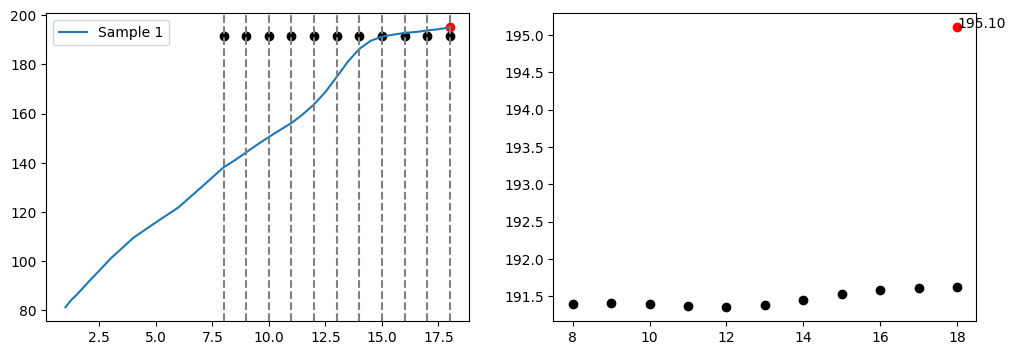

<Figure size 600x400 with 0 Axes>

In [67]:
grid = X.grid_points[0]
fig, ax = plt.subplots(1,2,figsize=(12,4))
plt.figure(figsize=(6, 4))
ax[0].scatter(x = [grid[2*i] for i in range(5, 16)],y=pred_sequence,color = 'black')
ax[0].scatter(x = [18],y=y_train[0],color = 'red')
ax[0].plot(grid, X_train[0,:], label='Sample 1')
for x in [grid[2*i] for i in range(5, 16)]:
    ax[0].axvline(x=x, color='grey', linestyle='--')
ax[0].legend()
ax[1].scatter(x = [grid[2*i] for i in range(5, 16)],y=pred_sequence,color = 'black')
ax[1].scatter(x = [18],y=y_train[0],color = 'red')
ax[1].text(18, y_train[0], f'{y_train[0]:.2f}', color='black')
plt.show()

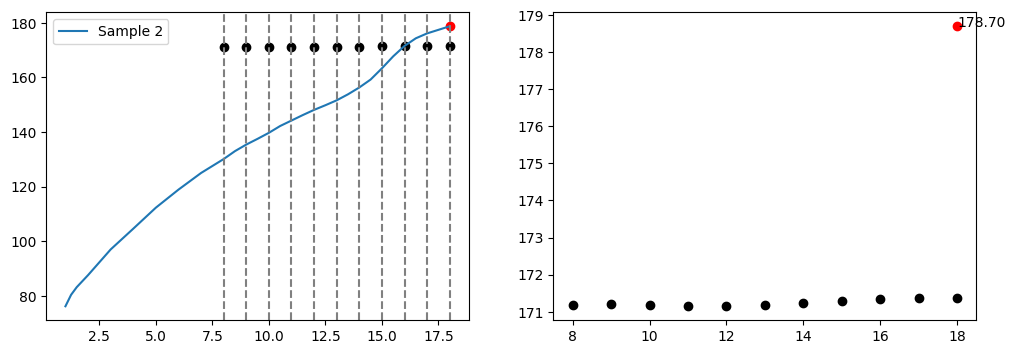

In [75]:
import matplotlib.pyplot as plt

pred =  beta[:T] @ X_matrix[1,:T]
pred_sequence = []
pred_sequence.append(pred)
for m in range(K-T) :
  grid_new = X.grid_points[0][2*m+T+4:2*m+T+7]
  fd1 = skfda.FDataGrid(X_train[1,2*m+T+4:2*m+T+7],grid_new)
  fd2 = skfda.FDataGrid(basis_matrix[m+T,2*m+T+4:2*m+T+7],grid_new)
  pred += beta[m+T] * inner_product(fd1, fd2)
  pred_sequence.append(pred[0])
  grid = X.grid_points[0]

fig, ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(x = [grid[2*i] for i in range(5, 16)],y=pred_sequence,color = 'black')
ax[0].scatter(x = [18],y=y_train[1],color = 'red')
ax[0].plot(grid, X_train[1,:], label='Sample 2')
for x in [grid[2*i] for i in range(5, 16)]:
    ax[0].axvline(x=x, color='grey', linestyle='--')
ax[0].legend()
ax[1].scatter(x = [grid[2*i] for i in range(5, 16)],y=pred_sequence,color = 'black')
ax[1].scatter(x = [18],y=y_train[1],color = 'red')
ax[1].text(18, y_train[1], f'{y_train[1]:.2f}', color='black')
plt.show()

In [32]:
grid = X.grid_points[0][:11]
grid_new = X.grid_points[0][10:13]
for j in range(3) :
  X_pred = np.zeros(T+1)
  beta[T] = beta_new
  for t in range(T) :
    fd1 = skfda.FDataGrid(X_test[j,:11],grid)
    fd2 = skfda.FDataGrid(basis_matrix[t,:11],grid)
    X_pred[t] = inner_product(fd1, fd2)
  fd1 = skfda.FDataGrid(X_test[j,10:13],grid_new)
  fd2 = skfda.FDataGrid(basis_matrix[t,10:13],grid_new)
  X_pred[T] = inner_product(fd1, fd2)
  print(beta[:T+1] @ X_pred)
  print(y_test[j])

167.63697113438334
166.8
179.31201926666014
168.6
178.25733743188968
169.2
